In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_excel('Assignment.xls')
df

,YEAR,Actual Rainfall: JUN,Actual Rainfall: JUL,Actual Rainfall: AUG,Actual Rainfall: SEPT,Actual Rainfall: JUN-SEPT
0,1901,99.3,295.4,354.8,113.8,863.3
1,1902,62.3,334.2,237.6,216.0,850.0
2,1903,96.2,392.7,286.6,211.5,987.1
3,1904,180.5,259.1,200.9,165.8,806.3
4,1905,59.8,340.6,178.9,204.1,783.4
...,...,...,...,...,...,...
111,2012,99.3,311.9,305.5,218.2,934.9
112,2013,275.9,437.6,299.2,180.7,1193.4
113,2014,64.6,358.5,256.4,201.1,880.5
114,2015,204.5,267.9,204.8,141.8,818.9


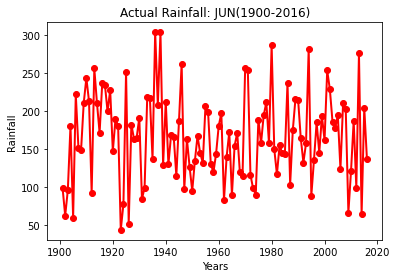

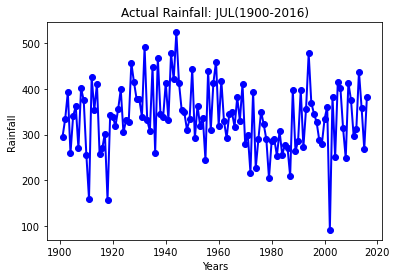

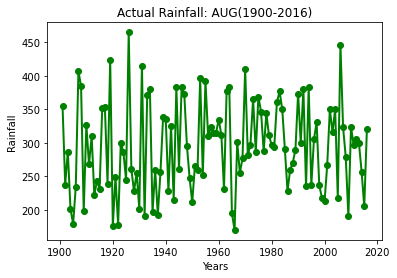

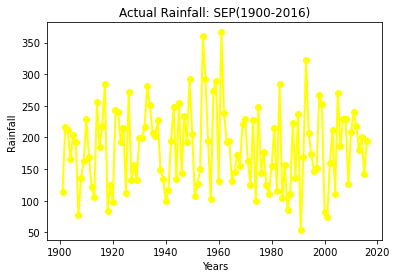

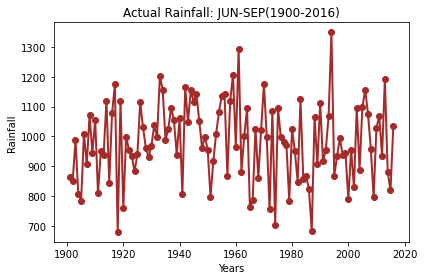

In [64]:

plt.figure()
plt.plot(df['YEAR'],df['Actual Rainfall: JUN'],'-o',color='red',linewidth=2)
plt.title('Actual Rainfall: JUN(1900-2016)')
plt.xlabel('Years')
plt.ylabel('Rainfall')
plt.figure()
plt.plot(df['YEAR'],df['Actual Rainfall: JUL'],'-o',color='blue',linewidth=2,label='July')
plt.title('Actual Rainfall: JUL(1900-2016)')
plt.xlabel('Years')
plt.ylabel('Rainfall')
plt.figure()
plt.plot(df['YEAR'],df['Actual Rainfall: AUG'],'-o',color='green',linewidth=2,label='August')
plt.title('Actual Rainfall: AUG(1900-2016)')
plt.xlabel('Years')
plt.ylabel('Rainfall')
plt.figure()
plt.plot(df['YEAR'],df['Actual Rainfall: SEPT'],'-o',color='yellow',linewidth=2,label='August')
plt.title('Actual Rainfall: SEP(1900-2016)')
plt.xlabel('Years')
plt.ylabel('Rainfall')
plt.figure()
plt.plot(df['YEAR'],df['Actual Rainfall: JUN-SEPT'],'-o',color='brown',linewidth=2,label='August')
plt.title('Actual Rainfall: JUN-SEP(1900-2016)')
plt.xlabel('Years')
plt.ylabel('Rainfall')

plt.tight_layout()



In [65]:
df.columns

Index(['YEAR', 'Actual Rainfall: JUN', 'Actual Rainfall: JUL',
       'Actual Rainfall: AUG', 'Actual Rainfall: SEPT',
       'Actual Rainfall: JUN-SEPT'],
      dtype='object')

In [51]:
cols_to_keep=['YEAR', 'Actual Rainfall: JUN', 'Actual Rainfall: JUL',
       'Actual Rainfall: AUG', 'Actual Rainfall: SEPT']
x=df[cols_to_keep]
y=df['Actual Rainfall: JUN-SEPT']
from sklearn.model_selection import train_test_split


In [52]:
x_train=x[:99]
y_train=y[:99]
x_test=x[99:]
y_test=y[99:]

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10).fit(x_train,y_train)

In [54]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))


0.8362497927711755
0.8036776859105007


In [55]:
prediction=knn.predict(x_test)



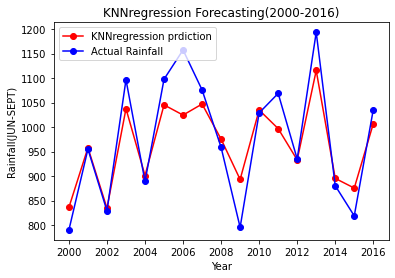

In [56]:
plt.figure()
plt.plot(x_test['YEAR'],prediction,'-o',color='red',label='KNNregression prdiction')
plt.plot(x_test['YEAR'],y_test,'-o',color='blue',label='Actual Rainfall')
plt.title('KNNregression Forecasting(2000-2016)')
plt.xlabel('Year')
plt.ylabel('Rainfall(JUN-SEPT)')
plt.legend(loc=2)

In [57]:
from scipy.spatial import distance
def DTW(a, b):   
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
   
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0
    

    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10,metric=DTW).fit(x_train,y_train)

In [59]:

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))


0.770763142029333
0.6714709690346146


In [60]:
prediction_dtw=knn.predict(x_test)


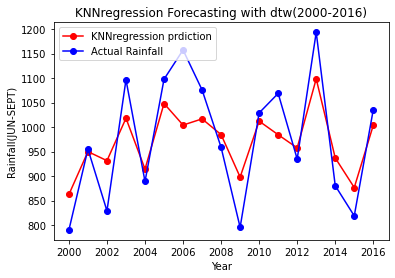

In [61]:
plt.figure()
plt.plot(x_test['YEAR'],prediction_dtw,'-o',color='red',label='KNNregression prdiction')
plt.plot(x_test['YEAR'],y_test,'-o',color='blue',label='Actual Rainfall')
plt.title('KNNregression Forecasting with dtw(2000-2016)')
plt.xlabel('Year')
plt.ylabel('Rainfall(JUN-SEPT)')
plt.legend(loc=2)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x_train,y_train)



In [12]:
rf.score(x_test,y_test)

0.7175028165579775